In [1]:
from pandas import Series, DataFrame
import pandas as pd
traffic_data=pd.read_csv("C:/Users/Pooja Dawada/Desktop/ut/summer/Data Analytics Python/Project/los-angeles-traffic-collision-data/traffic-collision-data-from-2010-to-present.csv")
import numpy as np

In [2]:
#Editing the data to extract latitude and longitude
new = traffic_data['Location'].str.split(",", expand=True)
new2 = new[0].str.split(":", expand=True)
traffic_data['Latitude'] = new2[1].str.replace("'","").astype(float)
traffic_data['Longitude'] = new[5].str.split(":", expand=True)[1].str.replace("'","").str.replace("}","").astype(float)
#Dropping the 0 lats and Longs as that is missing data
traffic_data= traffic_data[traffic_data['Latitude'] != 0.0] 

In [47]:
import gmplot
# For improved table display in the notebook
from IPython.display import display

In [4]:
traffic_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),Latitude,Longitude
0,191713007,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1040,17,Devonshire,1788,997,TRAFFIC COLLISION,NaN,...,PARTHENIA ST,"{'latitude': '34.2285', 'human_address': '{""ad...",18914.0,119.0,1424.0,NaN,2.0,65.0,34.2285,-118.5026
1,191913696,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,850,19,Mission,1924,997,TRAFFIC COLLISION,NaN,...,EDGECLIFF DR,"{'latitude': '34.2905', 'human_address': '{""ad...",18912.0,57.0,244.0,NaN,1.0,47.0,34.2905,-118.4581
2,191611704,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,910,16,Foothill,1693,997,TRAFFIC COLLISION,NaN,...,LAURELGROVE AV,"{'latitude': '34.2085', 'human_address': '{""ad...",8888.0,153.0,472.0,NaN,5.0,14.0,34.2085,-118.4002
3,191913694,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,700,19,Mission,1964,997,TRAFFIC COLLISION,NaN,...,NORDHOFF ST,"{'latitude': '34.2354', 'human_address': '{""ad...",19730.0,134.0,417.0,NaN,3.0,59.0,34.2354,-118.4516
4,191514323,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1200,15,N Hollywood,1513,997,TRAFFIC COLLISION,NaN,...,BELLAIRE AV,"{'latitude': '34.2012', 'human_address': '{""ad...",8888.0,180.0,1503.0,NaN,5.0,71.0,34.2012,-118.4094


In [ ]:
latitudes = traffic_data["Latitude"]
longitudes = traffic_data["Longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(-118.68, 33.33, 10)
#gmap = gmplot.GoogleMapPlotter.from_geocode("Los Angeles")
#Lon = np.arange(-118.68, -117.71, 0.0097) 
#Lat = np.arange(33.33, 34.75, 0.0142) 

# Overlay our datapoints onto the map
#gmap.heatmap(latitudes, longitudes)

gmap.scatter(latitudes, longitudes, '#3B0B39', size=40, marker=False)

# Generate the heatmap into an HTML file
gmap.draw("my_heatmap.html")

In [11]:
latitudes.head()

0    34.2285
1    34.2905
2    34.2085
3    34.2354
4    34.2012
Name: Latitude, dtype: float64

In [9]:
gmap

In [23]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

data= traffic_data.groupby(['Latitude','Longitude'])['DR Number'].count().reset_index()


In [42]:
min(data['Longitude'])

-118.6673

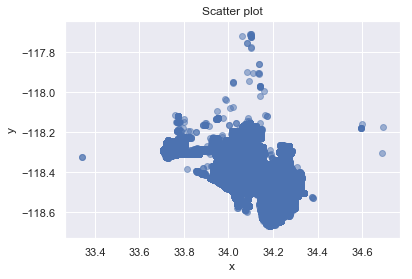

In [64]:
#Scatterplot
import numpy as np
import matplotlib.pyplot as plt
traffic_data= traffic_data[traffic_data['Latitude'] != 0.0] 
x=traffic_data['Latitude']
y=traffic_data['Longitude']
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from datetime import date
import calendar

###Time of accident, day of week

In [31]:
#Date edits
traffic_data['Date'] =  pd.to_datetime(traffic_data['Date Occurred'], format='%Y-%m-%dT%H:%M:%S')
traffic_data['year'] = pd.DatetimeIndex(traffic_data['Date']).year
traffic_data['month'] = pd.DatetimeIndex(traffic_data['Date']).month
traffic_data['weekday']= pd.DatetimeIndex(traffic_data['Date']).dayofweek
traffic_data['Time (hour)'] = traffic_data['Time Occurred'].floordiv(100)
traffic_data['day-of-week'] = traffic_data['Date'].dt.day_name()

In [49]:
traffic_data.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Latitude,Longitude,Date,year,month,weekday,day-of-week,Time (hour),Time Range,Age Range
0,191713007,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1040,17,Devonshire,1788,997,TRAFFIC COLLISION,NaN,...,34.2285,-118.5026,2019-07-20,2019,7,5,Saturday,10,"(8, 12]","(30.0, 40.0]"
1,191913696,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,850,19,Mission,1924,997,TRAFFIC COLLISION,NaN,...,34.2905,-118.4581,2019-07-20,2019,7,5,Saturday,8,"(4, 8]","(40.0, 50.0]"
2,191611704,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,910,16,Foothill,1693,997,TRAFFIC COLLISION,NaN,...,34.2085,-118.4002,2019-07-20,2019,7,5,Saturday,9,"(8, 12]",NaN
3,191913694,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,700,19,Mission,1964,997,TRAFFIC COLLISION,NaN,...,34.2354,-118.4516,2019-07-20,2019,7,5,Saturday,7,"(4, 8]","(30.0, 40.0]"
4,191514323,2019-07-20T00:00:00.000,2019-07-20T00:00:00.000,1200,15,N Hollywood,1513,997,TRAFFIC COLLISION,NaN,...,34.2012,-118.4094,2019-07-20,2019,7,5,Saturday,12,"(8, 12]","(20.0, 30.0]"


In [65]:
#Do the timings of accidents vary depending on day of the week?
traffic_data['Time Range'] = pd.cut(traffic_data['Time (hour)'], [0,4,8,12,16,20,24])
traffic_data_ans = traffic_data.groupby(['day-of-week','Time Range'])[['DR Number']].nunique()
dftemp = traffic_data_ans.unstack(level=-1)
ans1 = dftemp*100/dftemp.sum()
ans1

DR Number                                                       
Time Range      (0, 4]     (4, 8]    (8, 12]   (12, 16]   (16, 20]   (20, 24]
day-of-week                                                                  
Friday       11.899963  16.016011  15.242021  16.273091  16.556410  17.678618
Monday       10.948988  15.997588  14.592547  14.386492  13.725438  11.331261
Saturday     23.842507   9.162773  13.523088  13.432517  13.431717  18.764569
Sunday       27.893377   7.611918  11.080042  11.842274  12.242548  14.504015
Thursday      9.438783  17.007486  14.923411  14.757151  14.915499  13.619714
Tuesday       7.579414  17.179990  15.403554  14.793875  14.262885  11.753062
Wednesday     8.396968  17.024234  15.235337  14.514600  14.865504  12.348762

In [63]:
#Futile attempts at the heatmap (Ignore)
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
heatmap1 = ans1.stack().reset_index()
ax = sns.heatmap(heatmap1)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [39]:
#Victim age and time relationship?
traffic_data['Age Range'] = pd.cut(traffic_data['Victim Age'], [0,10,20,30,40,50,60])
traffic_data_ans2 = traffic_data.groupby(['Age Range','Time Range'])[['DR Number']].nunique()
dftemp2 = traffic_data_ans2.unstack(level=-1)

In [40]:
dftemp2

DR Number                                             
Time Range    (0, 4]   (4, 8]  (8, 12] (12, 16] (16, 20] (20, 24]
Age Range                                                        
(0, 10]          NaN      1.0      NaN      2.0      1.0      NaN
(10, 20]       801.0    933.0   1594.0   2571.0   2497.0   1475.0
(20, 30]      8923.0  12927.0  19493.0  26455.0  28712.0  14899.0
(30, 40]      5726.0  12653.0  17387.0  22556.0  22286.0  10348.0
(40, 50]      4446.0  10888.0  15409.0  19745.0  18160.0   8065.0
(50, 60]      2540.0   7835.0  12453.0  15481.0  13452.0   5289.0

In [50]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = traffic_data['Victim Age']
plt.hist(x, bins=20)
plt.show()

AttributeError: 'Series' object has no attribute 'series'

In [47]:
plot(traffic_data.groupby(['Victim Age'])[['DR Number']].nunique())

NameError: name 'plot' is not defined